In [26]:
from sepsis_types import STATES, ACTIONS, Action, State, state_to_index, random_initial_state, random_policy
import sepsis_gym as sgym
import train
import matplotlib.pyplot as plt
import numpy as np
import transition_model_gym as tm
import thompson_sampling as ts
import evaluate as ev

In [2]:
state = STATES[7]# random_initial_state()
state

State(hr=<Level.LOW: -1>, bp=<Level.LOW: -1>, o2=<Level.LOW: -1>, glu=<Level.SUPER_LOW: -2>, diabetic=True, abx=False, vaso=False, vent=False)

In [3]:
action = ACTIONS[len(ACTIONS) - 1]
action

Action(abx=False, vaso=False, vent=False)

In [4]:
fluctuations = [state_to_index[sgym.get_next_state(sgym.TRUE_ENV_PARAMS, state, action)] for _ in range(100)]
fluctuations

[7,
 7,
 7,
 87,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 23,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 23,
 87,
 183,
 103,
 7,
 7,
 167,
 7,
 7,
 7,
 87,
 23,
 567,
 7,
 7,
 567,
 487,
 487,
 7,
 7,
 7,
 7,
 7,
 7,
 663,
 23,
 23,
 7,
 7,
 487,
 7,
 7,
 487,
 7,
 7,
 7,
 167,
 7,
 7,
 7,
 247,
 7,
 23,
 87,
 7,
 7,
 7,
 23,
 7,
 87,
 7,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 7,
 7,
 487,
 23,
 7,
 7,
 23,
 7,
 7,
 23,
 7,
 7,
 167,
 7,
 23,
 7,
 23]

In [5]:
policy = random_policy()

In [6]:
episode = sgym.run_episode(policy)

In [7]:
episode.visited

[State(hr=<Level.HIGH: 1>, bp=<Level.LOW: -1>, o2=<Level.NORMAL: 0>, glu=<Level.SUPER_HIGH: 2>, diabetic=True, abx=False, vaso=False, vent=False),
 State(hr=<Level.HIGH: 1>, bp=<Level.NORMAL: 0>, o2=<Level.NORMAL: 0>, glu=<Level.SUPER_HIGH: 2>, diabetic=True, abx=False, vaso=True, vent=True),
 State(hr=<Level.HIGH: 1>, bp=<Level.HIGH: 1>, o2=<Level.NORMAL: 0>, glu=<Level.SUPER_HIGH: 2>, diabetic=True, abx=False, vaso=True, vent=True)]

In [8]:
episode.rewards

[0, -1]

In [54]:
# dqn_training = train.train_dqn(sgym.true_env, 100_000, "Test")
dqn_training = train.Training.load("data/trainings/DQN-Test_object.pkl")
# ppo_training = train.train_ppo(sgym.true_env, 100_000, "Test")
ppo_training = train.Training.load("data/trainings/PPO-Test_object.pkl")
# took 1m 25.8s

Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


In [10]:
# # to test whether one model has a unique policy

# import hashlib

# def hash_policy(policy):
#     policy_str = ''.join(map(str, policy))
#     return hashlib.md5(policy_str.encode()).hexdigest()

# # Hash the policies
# hashed_policies = [hash_policy(get_pol(training)) for _ in range(100)]

# # Find differences
# unique_hashes = set(hashed_policies)
# print(f"Number of unique policies: {len(unique_hashes)}")


# output: Number of unique policies: 1

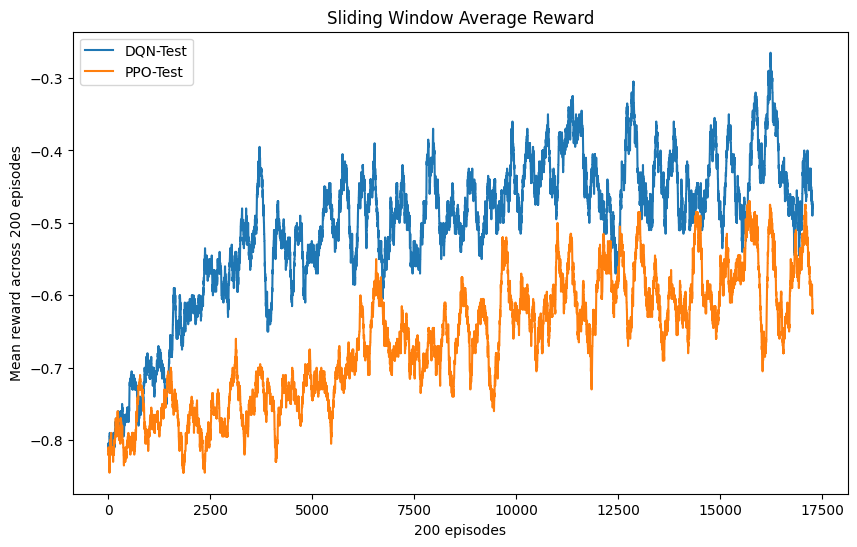

In [11]:
train.plot_rewards([dqn_training, ppo_training], len(dqn_training.episodes), 200)

In [12]:
dqn_training.evaluate_policy(100000)
# -0.98616


-0.62447

In [13]:
ppo_training.evaluate_policy(100000)
# -0.96425

-0.64873

In [62]:
# dqn_1M_training = train.train_dqn(true_env, 1_000_000, "Test-1M")
dqn_1M_training = train.Training.load("data/trainings/DQN-Test-1M_object.pkl")
# ppo_1M_training = train.train_ppo(true_env, 1_000_000, "Test-1M")
ppo_1M_training = train.Training.load("data/trainings/PPO-Test-1M_object.pkl")


Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


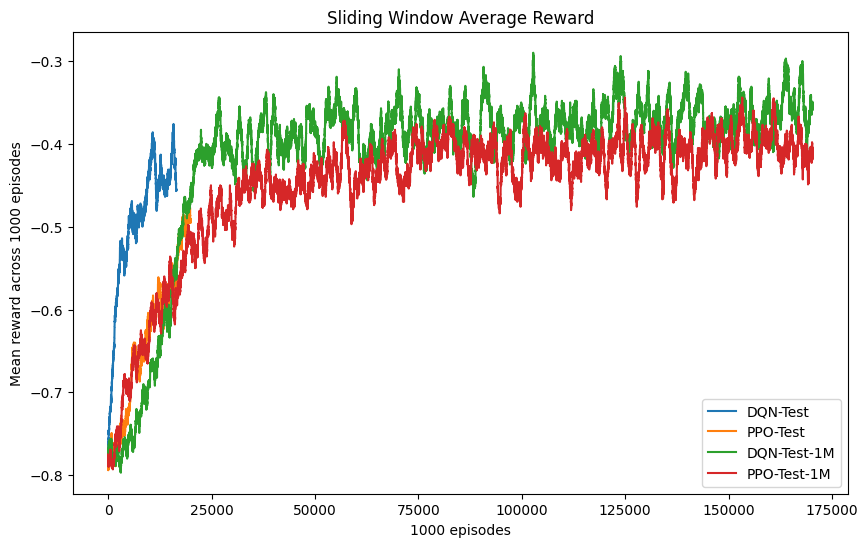

In [16]:
train.plot_rewards([dqn_training, ppo_training, dqn_1M_training, ppo_1M_training], len(dqn_1M_training.episodes), 1000)


In [ ]:
env = tm.TrModelEnv(tm.transition_model())
dqn_TRMod_training = train.train_dqn(env, 100_000, "Transition_Model_100K")


In [13]:
dqn_TRMod_training.evaluate_policy(100000)

-0.84689

In [11]:
history = [sgym.run_episode(random_policy()) for _ in range(1_000_000)]

In [22]:
env = tm.TrModelEnv(tm.transition_model(tm.update_state_counts(history)))
trmod_hist = train.train_dqn(env, 500_000, "Transition_Model_500K_History")

In [23]:
trmod_hist.evaluate_policy(10000)

-0.6348

In [ ]:
dqn_training.evaluate_policy(10000)

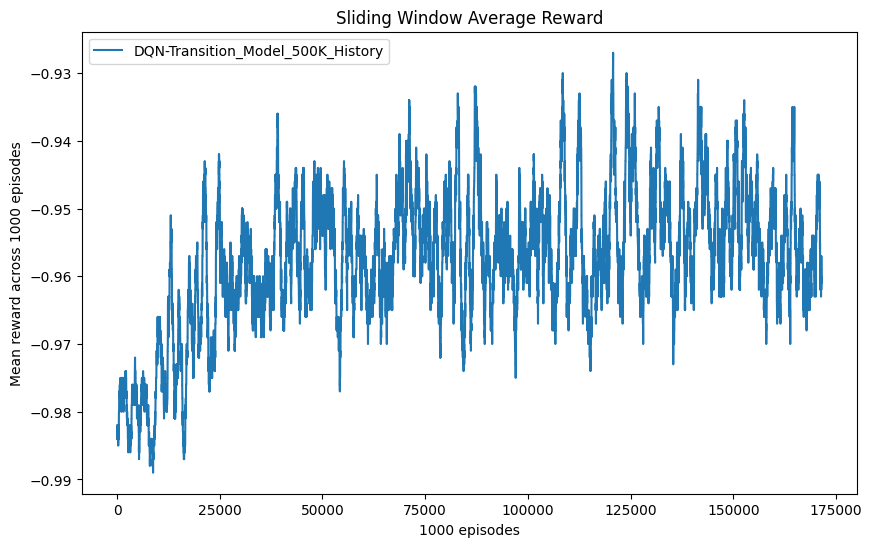

In [24]:
train.plot_rewards([trmod_hist], len(trmod_hist.episodes), 1000)

In [ ]:
V = np.zeros(len(STATES))
policy, values = tm.matrix_value_iteration(V, tm.transition_model(tm.update_state_counts(history)))
# takes 34s

In [18]:
train.evaluate_policy(policy, 10000)

-0.6785

In [ ]:
nr_iterations = 1000
nr_episodes = 100

episodes = []
tr = tm.transition_model()
V = np.zeros(len(STATES))
learned = [tm.matrix_value_iteration(V, tr)]
state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
pol, V = learned[0]

In [ ]:
for _ in range(nr_iterations):
    tr = tm.transition_model(state_counts)
    opt_pol = tm.matrix_value_iteration(V, tr)
    learned.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = sgym.run_episode(pol)
        episodes.append(episode)
        state_counts = tm.update_state_counts(episodes, state_counts)
# ran for 500 minutes

In [57]:
ts_eval = ts.ThompsonSampling(len(episodes), episodes, "TS-100", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval.save()

'data/thompson_sampling/TS-100.pkl'

In [58]:
len(ts_eval.episodes)

85700

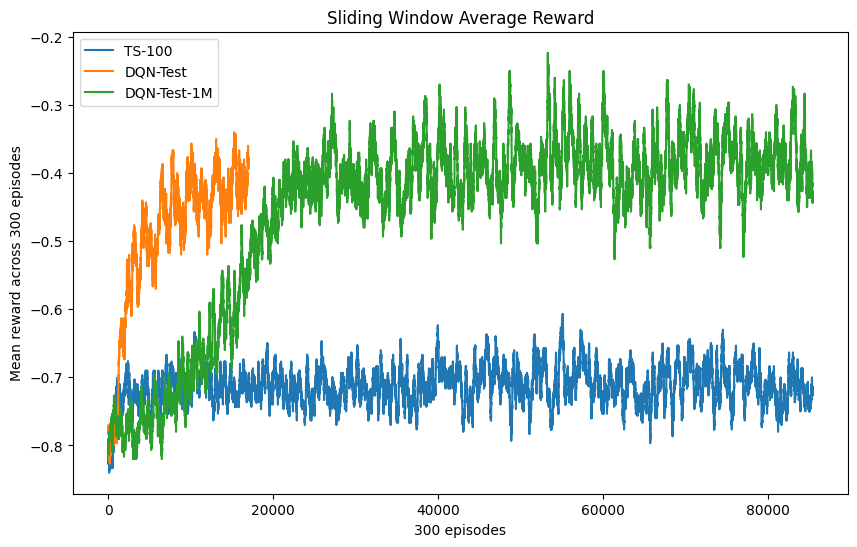

In [63]:
ev.plot_rewards([ts_eval, dqn_training, dqn_1M_training], len(ts_eval.episodes), 300)

In [ ]:
nr_iterations = 1000
nr_episodes = 10

episodes = []
tr = tm.transition_model()
V = np.zeros(len(STATES))
learned = [tm.matrix_value_iteration(V, tr)]
state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
pol, V = learned[0]

In [ ]:
for _ in range(nr_iterations):
    tr = tm.transition_model(state_counts)
    opt_pol = tm.matrix_value_iteration(V, tr)
    learned.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = sgym.run_episode(pol)
        episodes.append(episode)
        state_counts = tm.update_state_counts(episodes, state_counts)

In [ ]:
ts_eval_10 = ts.ThompsonSampling(len(episodes), episodes, "TS-10", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval_10.save()

In [ ]:
ev.plot_rewards([ts_eval, ts_eval_10], len(ts_eval.episodes), 300)


In [ ]:
nr_iterations = 1000
nr_episodes = 100

episodes = []
tr = tm.transition_model()
V = np.zeros(len(STATES))
learned = [tm.matrix_value_iteration(V, tr)]
state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
pol, V = learned[0]

In [ ]:
for _ in range(nr_iterations):
    tr = tm.transition_model(state_counts)
    opt_pol = tm.matrix_value_iteration(V, tr)
    learned.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = sgym.run_episode(pol)
        episodes.append(episode)
        state_counts = tm.update_state_counts(episodes, state_counts)

In [ ]:
ts_eval = ts.ThompsonSampling(len(episodes), episodes, "TS-100b", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval.save()